# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [39]:
#Set dataframe to store data
weather = pd.DataFrame({"City": cities, "Cloudiness": "", "Date": "", "Humidity": "", "Lat": "", "Lng": "", "Max Temp": "", "Windspeed": ""})

weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,port lincoln,,,,,,,
1,new norfolk,,,,,,,
2,bathsheba,,,,,,,
3,katsuura,,,,,,,
4,qaanaaq,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
#Track record number and record set
record_number = 1
set_number = 1

#Base url
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Loop through cities and print responses
print(
'''------------------------------------------
Beginning Data Retrieval
------------------------------------------''')
for index, row in weather.iterrows(): 
    #Write query using base url and query parameters
    query_url = base_url + row["City"] + "," + "&APPID=" + weather_api_key
    
    response = requests.get(query_url).json()
    
    #try/except for potential errors found
    try: 
        print(f'Processing Record {record_number} of Set {set_number} | {response["name"]}')
        
        #Build the dataframe
        weather.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather.loc[index, "Date"] = response['dt']
        weather.loc[index, "Humidity"] = response["main"]["humidity"]
        weather.loc[index, "Lat"] = response["coord"]["lat"]
        weather.loc[index, "Lng"] = response["coord"]["lon"]
        weather.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather.loc[index, "Windspeed"] = response["wind"]["speed"]
        
        record_number += 1
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    #set call limits
    if record_number == 60:
        set_number += 1
        record_number = 1
        time.sleep(60)
        
print(
'''------------------------------------------
Data Retrival Complete
------------------------------------------''')

------------------------------------------
Beginning Data Retrieval
------------------------------------------
Processing Record 1 of Set 1 | Port Lincoln
Processing Record 2 of Set 1 | New Norfolk
Processing Record 3 of Set 1 | Bathsheba
Processing Record 4 of Set 1 | Katsuura
Processing Record 5 of Set 1 | Qaanaaq
Processing Record 6 of Set 1 | Cape Town
Processing Record 7 of Set 1 | Evensk
Processing Record 8 of Set 1 | Ponta do Sol
Processing Record 9 of Set 1 | Jamestown
Processing Record 10 of Set 1 | Morant Bay
Processing Record 11 of Set 1 | Hermanus
Processing Record 12 of Set 1 | Rikitea
Processing Record 13 of Set 1 | Puerto Ayora
Processing Record 14 of Set 1 | Grove City
Processing Record 15 of Set 1 | Khatanga
Processing Record 16 of Set 1 | Bredasdorp
Processing Record 17 of Set 1 | Pevek
City not found. Skipping...
Processing Record 18 of Set 1 | Baker City
Processing Record 19 of Set 1 | Hasaki
Processing Record 20 of Set 1 | Churapcha
Processing Record 21 of Set 1 | 

Processing Record 5 of Set 4 | Dessie
City not found. Skipping...
Processing Record 6 of Set 4 | Barra de Tecoanapa
Processing Record 7 of Set 4 | Coquimbo
Processing Record 8 of Set 4 | Carnarvon
Processing Record 9 of Set 4 | Huejuquilla el Alto
Processing Record 10 of Set 4 | Umluj
City not found. Skipping...
Processing Record 11 of Set 4 | Wattegama
Processing Record 12 of Set 4 | Gizo Government Station
Processing Record 13 of Set 4 | Lucapa
Processing Record 14 of Set 4 | Ola
Processing Record 15 of Set 4 | Mossamedes
Processing Record 16 of Set 4 | Cayenne
Processing Record 17 of Set 4 | Kieta
Processing Record 18 of Set 4 | Bambous Virieux
Processing Record 19 of Set 4 | Prince Rupert
Processing Record 20 of Set 4 | Vila Franca do Campo
City not found. Skipping...
Processing Record 21 of Set 4 | Vestmannaeyjar
Processing Record 22 of Set 4 | Nerchinskiy Zavod
Processing Record 23 of Set 4 | Coyhaique
Processing Record 24 of Set 4 | Longyearbyen
Processing Record 25 of Set 4 | S

Processing Record 6 of Set 7 | Loudi
Processing Record 7 of Set 7 | Inírida
Processing Record 8 of Set 7 | Nanga Eboko
Processing Record 9 of Set 7 | Planaltina
Processing Record 10 of Set 7 | Crotone
City not found. Skipping...
Processing Record 11 of Set 7 | Manoel Urbano
Processing Record 12 of Set 7 | Brigantine
City not found. Skipping...
Processing Record 13 of Set 7 | Aswān
Processing Record 14 of Set 7 | Farafangana
Processing Record 15 of Set 7 | Husavik
City not found. Skipping...
Processing Record 16 of Set 7 | Portree
Processing Record 17 of Set 7 | Port-Cartier
Processing Record 18 of Set 7 | Vao
Processing Record 19 of Set 7 | Qui Nhon
City not found. Skipping...
Processing Record 20 of Set 7 | Vilhena
Processing Record 21 of Set 7 | Sedalia
Processing Record 22 of Set 7 | Ambon City
Processing Record 23 of Set 7 | Muriwai Beach
Processing Record 24 of Set 7 | Iranshahr
Processing Record 25 of Set 7 | Pacific Grove
Processing Record 26 of Set 7 | Sinnamary
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
#Remove NAs and cities not found
weather['Max Temp'] = weather['Max Temp'].replace("", np.nan)
weather = weather.dropna()

#Export to csv
#weather.to_csv("Output/weather.csv", index=False, header=True)

weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,port lincoln,0,1592425141,63,-34.73,135.87,55.92,19.33
1,new norfolk,0,1592425141,88,-42.78,147.06,33.01,2.91
2,bathsheba,40,1592425141,66,13.22,-59.52,86.00,19.46
3,katsuura,75,1592425141,88,35.13,140.3,69.80,8.05
4,qaanaaq,45,1592424908,89,77.48,-69.36,34.09,3.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

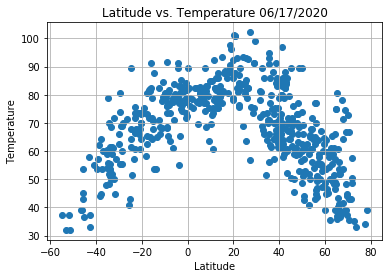

In [44]:
# Scatter plot of lattitude vs high temps
plt.scatter(weather["Lat"], weather["Max Temp"], marker="o")

# Set x,y labels and title
plt.title(f'Latitude vs. Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("Output/Latitude vs. Temperature Plot.png")

plt.show()

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

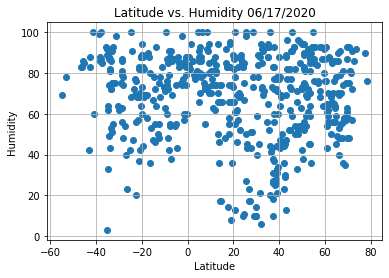

In [33]:
# Scatter plot of lattitude vs humidity
plt.scatter(weather["Lat"], weather["Humidity"], marker="o")

# Set x,y labels and title
plt.title(f'Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("Output/Latitude vs. Humidity Plot.png")

plt.show()

#### Latitude vs. Cloudiness Plot

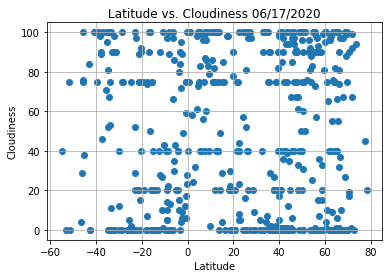

In [45]:
# Scatter plot of lattitude vs cloudiness
plt.scatter(weather["Lat"], weather["Cloudiness"], marker="o")

# Set x,y labels and title
plt.title(f'Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("Output/Latitude vs. Cloudiness Plot.png")

plt.show()

#### Latitude vs. Wind Speed Plot

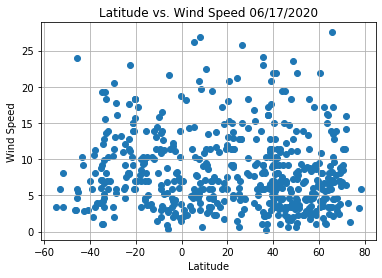

In [51]:
# Scatter plot of lattitude vs wind speed
plt.scatter(weather["Lat"], weather["Windspeed"], marker="o")

# Set x,y labels and title
plt.title(f'Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("Output/Latitude vs. Wind Speed Plot.png")

plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots
